C:\Users\pc\AppData\Local\Temp\ipykernel_14132\2516642742.py:39: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(
C:\Users\pc\AppData\Local\Temp\ipykernel_14132\2516642742.py:39: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(
C:\Users\pc\AppData\Local\Temp\ipykernel_14132\2516642742.py:39: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(
C:\Users\pc\AppData\Local\Temp\ipykernel_14132\2516642742.py:39: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(
C:\Users\pc\AppData\Local\Temp\ipykernel_14132\2516642742.py:39: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(
C:\Users\p

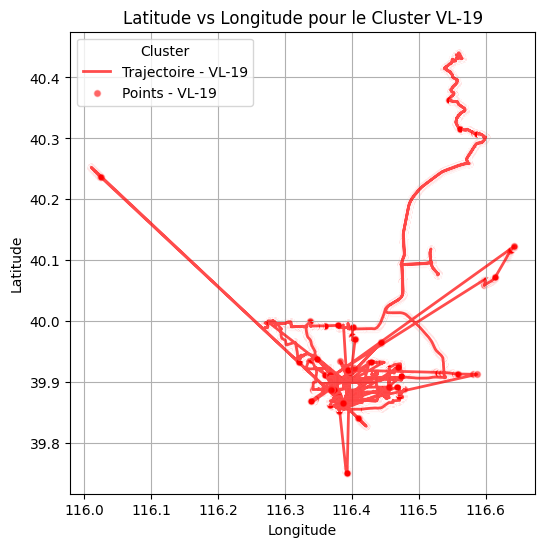

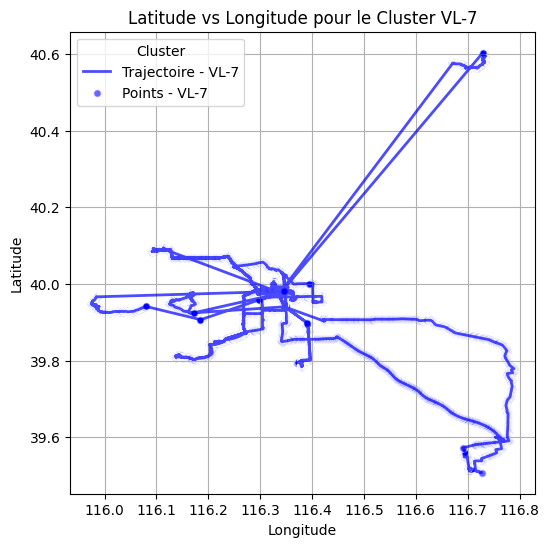

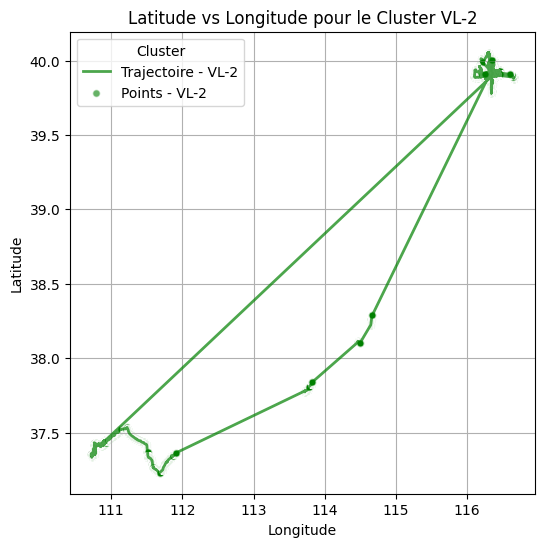

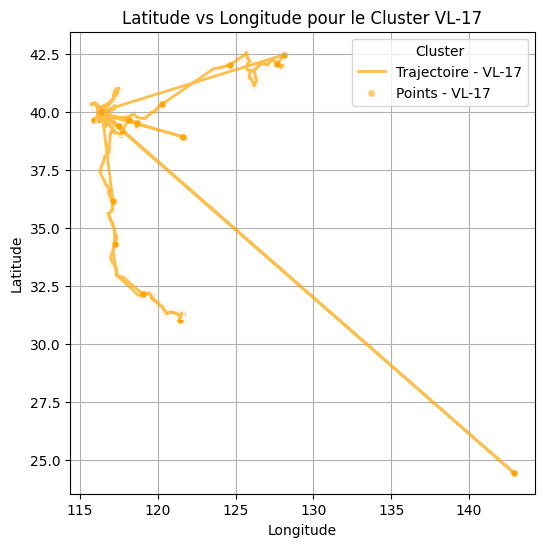

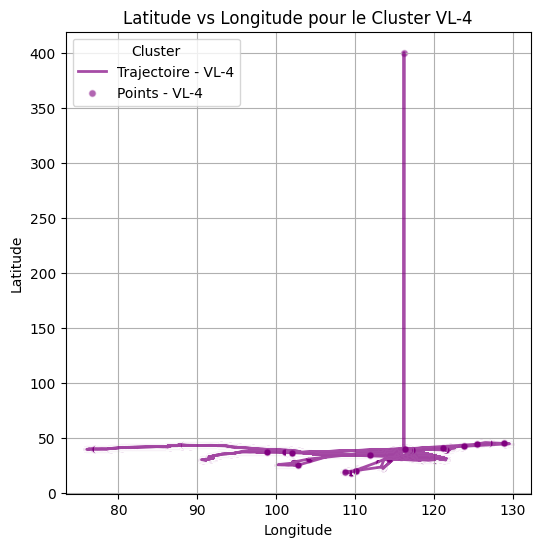

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Étape 1 : Définir les clusters ===
clusters = {
    "VL-19": ["019"],
    "VL-7": ["007"],
    "VL-2": ["002", "009"],
    "VL-17": ["001", "008", "011", "012", "013", "014", "015", "017"],
    "VL-4": ["000", "003", "004", "005", "006", "010", "016", "018", "020"]
}

# Fonction pour associer un utilisateur à son cluster
def assign_cluster(user_id):
    for cluster, users in clusters.items():
        if user_id in users:
            return cluster
    return None

# === Étape 2 : Charger les points ===
data_path = "Geolife -Trajectories20/Data"  # Dossier contenant les sous-dossiers utilisateurs

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Le dossier spécifié n'existe pas : {data_path}")

all_points = []

# Parcourir les répertoires utilisateurs
for user_dir in range(21):  # De "000" à "020"
    user_dir = f"{user_dir:03d}"  # Format en 3 chiffres
    trajectory_path = os.path.join(data_path, user_dir, "Trajectory")

    if os.path.isdir(trajectory_path):
        for file in os.listdir(trajectory_path):
            if file.endswith(".plt") or file.endswith(".csv"):
                try:
                    # Charger les données des points
                    user_data = pd.read_csv(
                        os.path.join(trajectory_path, file),
                        header=None,  # Pas d'en-tête dans le fichier
                        names=["latitude", "longitude", "altitude", "horodatage", "date", "heure"],
                        usecols=[0, 1, 2, 3, 4, 5],  # Charger toutes les colonnes nécessaires
                        on_bad_lines="skip"  # Ignorer les lignes mal formées
                    )

                    if user_data.empty:
                        print(f"Fichier vide ignoré : {file}")
                        continue

                    # Conversion explicite des colonnes latitude, longitude et altitude en numérique
                    user_data["latitude"] = pd.to_numeric(user_data["latitude"], errors="coerce")
                    user_data["longitude"] = pd.to_numeric(user_data["longitude"], errors="coerce")
                    user_data["altitude"] = pd.to_numeric(user_data["altitude"], errors="coerce")

                    # Supprimer les lignes avec des valeurs manquantes
                    user_data.dropna(subset=["latitude", "longitude"], inplace=True)

                    # Extraire l'ID utilisateur et déterminer le cluster
                    user_id = user_dir
                    cluster = assign_cluster(user_id)

                    if cluster:
                        user_data["utilisateur"] = user_id
                        user_data["cluster"] = cluster
                        all_points.append(user_data)
                except Exception as e:
                    print(f"Erreur lors du chargement du fichier {file}: {e}")
                    continue

# Vérifier si des données ont été chargées
if not all_points:
    raise ValueError("Aucune donnée valide n'a été trouvée dans les fichiers.")

# Fusionner toutes les données en un seul DataFrame
points_data = pd.concat(all_points, ignore_index=True)

# === Étape 3 : Création des graphiques pour chaque cluster ===
# Couleurs pour les clusters
colors = {
    "VL-19": "red",
    "VL-7": "blue",
    "VL-2": "green",
    "VL-17": "orange",
    "VL-4": "purple"
}

# Créer une figure distincte pour chaque cluster
for cluster, color in colors.items():
    cluster_data = points_data[points_data["cluster"] == cluster]
    
    # Créer un graphique pour chaque cluster
    plt.figure(figsize=(6, 6))
    
    # Afficher les points et les lignes de trajectoire
    plt.plot(cluster_data["longitude"], cluster_data["latitude"], 
             color=color, label=f"Trajectoire - {cluster}", alpha=0.7, linewidth=2)
    plt.scatter(cluster_data["longitude"], cluster_data["latitude"], 
                color=color, label=f"Points - {cluster}", alpha=0.6, edgecolors="w", s=30)
    
    # Ajouter des labels et une légende
    plt.title(f"Latitude vs Longitude pour le Cluster {cluster}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Cluster")
    plt.grid(True)
    
    # Afficher le graphique
    plt.show()
